In [2]:
markets = [
    'ACB.VN',
    'BCM.VN',
    'BID.VN',
    'BVH.VN',
    'CTG.VN',
    'FPT.VN',
    'GAS.VN',
    'GVR.VN',
    'HDB.VN',
    'HPG.VN',
    'MBB.VN',
    'MSN.VN',
    'MWG.VN',
    'PLX.VN',
    'POW.VN',
    'SAB.VN',
    'SHB.VN',
    'SSB.VN',
    'SSI.VN',
    'STB.VN',
    'TCB.VN',
    'TPB.VN',
    'VCB.VN',
    'VHM.VN',
    'VIB.VN',
    'VIC.VN',
    'VJC.VN',
    'VNM.VN',
    'VPB.VN',
    'VRE.VN',
]

In [3]:
import yfinance as yf

data = []
for stock in markets:
    data.append(yf.download(stock, start="2023-01-01", end="2024-04-1"))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

**HÀM NÀY DÙNG ĐỂ LẤY BIẾN ĐỘNG GIÁ CẢ TRONG KHOẢNG TỪ START ĐẾN END DATE**

Như vậy thời gian giao dịch chứng khoán cơ sở tại Việt Nam là:

Ngày giao dịch: Từ thứ Hai đến thứ Sáu, trong giờ hành chính nhà nước. 

Ngày cuối tuần (thứ Bảy, Chủ Nhật) và ngày lễ tết không tiến hành giao dịch chứng khoán. Các ngày lễ tết không giao dịch chứng khoán ở Việt Nam bao gồm: Tết Dương lịch, Tết Âm lịch, ngày Giỗ tổ Hùng Vương (10/3 Âm lịch), ngày 30/4, ngày 1/5, ngày Quốc khánh 2/9.


Không giao dịch trong những trường hợp hi hữu (như có quy định khẩn cấp hoặc thị trường gặp sự cố).

In [4]:
import numpy as np
import pandas as pd
def TakeMovement(start_date, end_date):
    movement = []
    for dt in data:
        filtered_data = dt.loc[start_date:end_date]
        open_prices = filtered_data['Open']
        close_prices = filtered_data['Close']
        movement.append(close_prices - open_prices)
    return np.array(movement)

Anh em để 5 ngày thoi

In [5]:
movement = TakeMovement("2024-03-25", "2024-03-29")

In [17]:
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

new = normalizer.fit_transform(movement)

print(new.max())
print(new.min())
print(new.mean())

def compute_CH_score(X, k):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    pipeline = make_pipeline(normalizer, kmeans)
    pipeline.fit(X)
    labels = pipeline.predict(X)
    return metrics.calinski_harabasz_score(X, labels)

def find_optimal_k(X, max_k):
    best_k = 2
    best_score = 0
    scores = []
    for k in range(2, max_k+1):
        score = compute_CH_score(X, k)
        scores.append(score)
    return scores

optimal_k = find_optimal_k(movement, max_k=15)


0.9850365626224087
-0.8867963503478639
-0.06894728039509841


C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

Text(0.5, 1.0, 'Caliinski Harabasz scores vs. number of clusters')

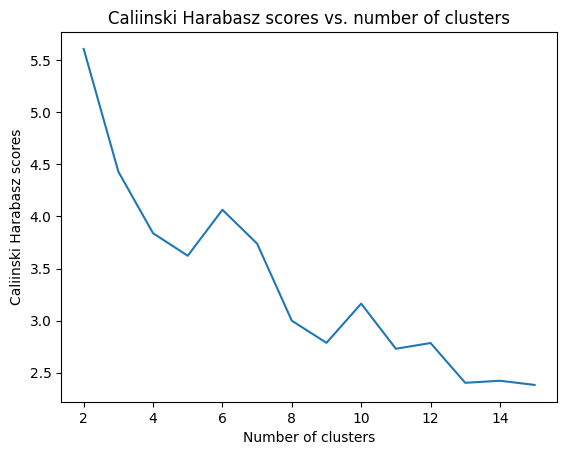

In [20]:
import matplotlib.pyplot as plt
plt.plot(range(2, 16), optimal_k)
plt.xlabel('Number of clusters')
plt.ylabel('Caliinski Harabasz scores')
plt.title('Caliinski Harabasz scores vs. number of clusters')

In [31]:
kmeans = KMeans(n_clusters=2, max_iter=1000)

pipeline = make_pipeline(normalizer,kmeans)

pipeline.fit(movement)

labels = pipeline.predict(movement)

df = pd.DataFrame({'labels': labels, 'companies': markets})

label_market_array = np.column_stack((labels, markets))

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [40]:
group = np.unique(labels)

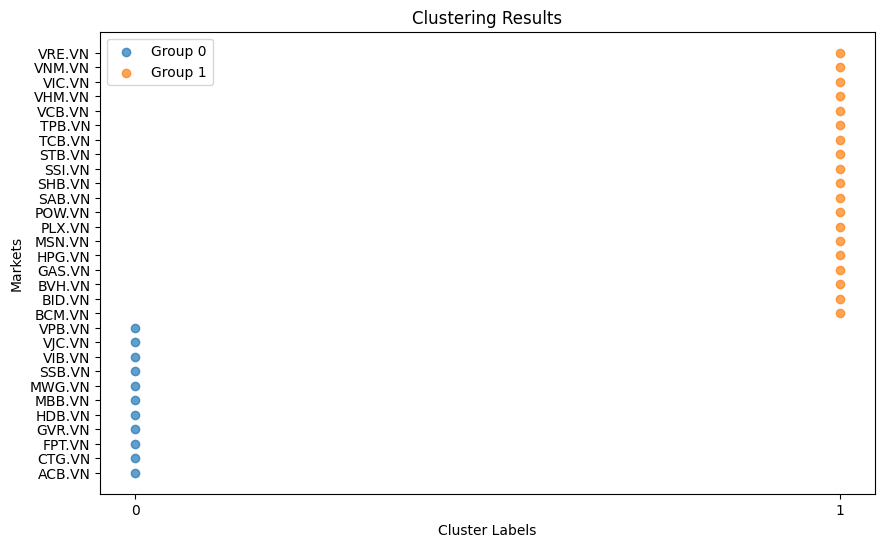

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Loop over each unique label
for label in np.unique(labels):
    # Select indices where the label matches
    indices = labels == label
    
    # Scatter plot for the selected indices
    plt.scatter(label_market_array[indices, 0], label_market_array[indices, 1], label=f'Group {label}', alpha=0.7)

# Set labels and title
plt.ylabel('Markets')
plt.xlabel('Cluster Labels')
plt.title('Clustering Results')

plt.legend()
plt.show()
